In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, sosfiltfilt, sosfilt

def get_spherical(x, y, z):
    r = (x**2 + y**2 + z**2)**0.5
    theta = np.arccos(z / r)  # polar angle
    phi = np.arctan2(y, x)  # azimuthal angle
    return r, theta, phi

In [ ]:
df = pd.read_csv("logs/log002.csv")
time = df["t_ms"].values

In [16]:
# Get magnetometer data and filter and convert to spherical coordinates
fc_hz = 20
fs = 100

sos = butter(N=4, Wn=fc_hz, btype="low", fs=fs, output="sos")

mag_raw = df[["mmc_mG_x", "mmc_mG_y", "mmc_mG_z"]].values
mag_filtered = sosfiltfilt(sos, mag_raw, axis=0)
mag_spherical = np.array([get_spherical(x, y, z) for x, y, z in mag_filtered])

In [ ]:
# Get angle data and filter it
fc_hz = 20
fs = 100

angle_data = df["angle_raw"].values
sos = butter(N=4, Wn=fc_hz, btype="low", fs=fs, output="sos")
angle_filtered = sosfiltfilt(sos, angle_data)

adjacent = 237.5 / 2
hypotenuse = 120



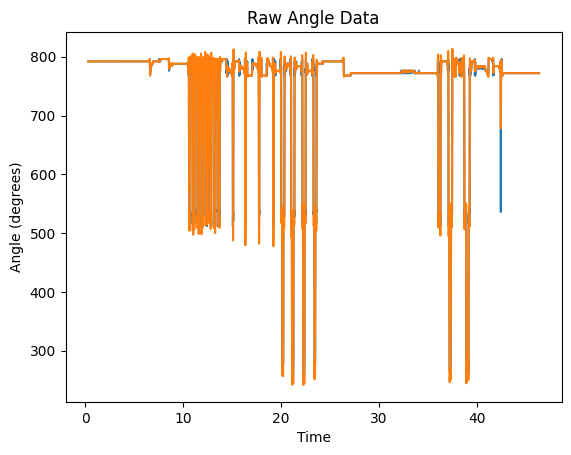

In [21]:
plt.plot(time, angle_data)
plt.plot(time, angle_filtered)
plt.title("Raw Angle Data")
plt.xlabel("Time")
plt.ylabel("Angle (degrees)")
plt.show()